In [1]:
import pandas as pd

In [12]:
weather = pd.read_csv('seoul_weather2020.csv', encoding='cp949')

In [13]:
weather
#데이터가 예쁘게 나와줘서 melt 사용이 필요없음...

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr)
0,108,서울,2020-01-01,-6.5,0.3,0.1,64.4,0.8
1,108,서울,2020-01-02,-0.7,3.8,NaN,65.4,0.0
2,108,서울,2020-01-03,-3.4,4.6,NaN,56.9,8.8
3,108,서울,2020-01-04,-2.8,6.1,NaN,50.8,7.9
4,108,서울,2020-01-05,-3.2,6.6,NaN,45.6,7.1
...,...,...,...,...,...,...,...,...
361,108,서울,2020-12-27,1.4,10.0,0.0,62.9,5.9
362,108,서울,2020-12-28,4.2,11.4,1.3,72.1,8.0
363,108,서울,2020-12-29,-6.2,4.3,0.2,70.8,0.0
364,108,서울,2020-12-30,-12.9,-6.2,NaN,55.5,8.3


In [16]:
mental = pd.read_csv('국립정신건강센터_일별 입원환자수.csv', encoding='cp949')

In [17]:
mental

,일자,요일,입원환자수
0,2020-01-01,수,81
1,2020-01-02,목,84
2,2020-01-03,금,87
3,2020-01-04,토,83
4,2020-01-05,일,84
...,...,...,...
361,2020-12-28,월,91
362,2020-12-29,화,77
363,2020-12-30,수,73
364,2020-12-31,목,58


In [22]:
mental.rename(columns = {'일자':'일시'},inplace=True)

In [23]:
mental

,일시,요일,입원환자수
0,2020-01-01,수,81
1,2020-01-02,목,84
2,2020-01-03,금,87
3,2020-01-04,토,83
4,2020-01-05,일,84
...,...,...,...
361,2020-12-28,월,91
362,2020-12-29,화,77
363,2020-12-30,수,73
364,2020-12-31,목,58


In [26]:
mental_weather = pd.merge(weather, mental, on='일시')

In [27]:
mental_weather
#합계 일조시간이 적을 수록 입원환자수가 많을 것이다.
#햇빛은 정신건강에 영향을 주기 때문에 이런 가설을 세워봄

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),요일,입원환자수
0,108,서울,2020-01-01,-6.5,0.3,0.1,64.4,0.8,수,81
1,108,서울,2020-01-02,-0.7,3.8,NaN,65.4,0.0,목,84
2,108,서울,2020-01-03,-3.4,4.6,NaN,56.9,8.8,금,87
3,108,서울,2020-01-04,-2.8,6.1,NaN,50.8,7.9,토,83
4,108,서울,2020-01-05,-3.2,6.6,NaN,45.6,7.1,일,84
...,...,...,...,...,...,...,...,...,...,...
360,108,서울,2020-12-27,1.4,10.0,0.0,62.9,5.9,일,97
361,108,서울,2020-12-28,4.2,11.4,1.3,72.1,8.0,월,91
362,108,서울,2020-12-29,-6.2,4.3,0.2,70.8,0.0,화,77
363,108,서울,2020-12-30,-12.9,-6.2,NaN,55.5,8.3,수,73


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

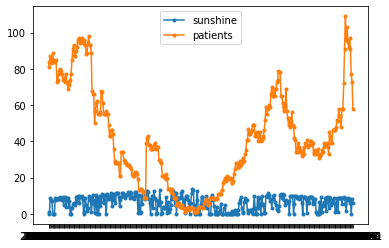

In [30]:
plt.plot(mental_weather['일시'], mental_weather['합계 일조시간(hr)'], marker='.', label = 'sunshine')
plt.plot(mental_weather['일시'], mental_weather['입원환자수'], marker='.', label = 'patients')
plt.legend()
#값이 크게 차이나는데 같은 y축을 공유하고 있어 그래프 인식이 힘들다

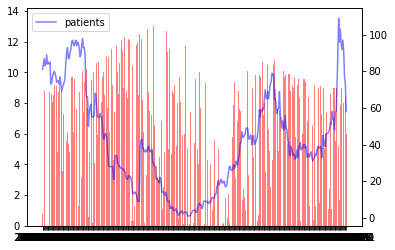

<Figure size 2160x2160 with 0 Axes>

In [38]:
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
plt.bar(mental_weather['일시'], mental_weather['합계 일조시간(hr)'],color = 'red', alpha = 0.5, label = 'sunshine')

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(mental_weather['일시'], mental_weather['입원환자수'], color = 'blue', alpha = 0.5, label = 'patients')
plt.legend()
plt.figure(figsize=(30,30))
plt.show()

#이중y축 그래프로 수정

In [ ]:
#합계일조시간과 환자수 간의 유의미한 상관관계는 찾을 수 없었다
#아무래도 국립정신건강센터에 입원한 환자수이기 때문에 우울감이라던지 좀더 일조량과 연관있는 데이터가 아니기 때문에 분석결과가 잘 나오지 않은 것 같음